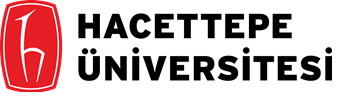

# <u> Meta-analysis of Turkish Energy and Climate Pathways </u>

## By Görkem Güngör and Latife Demirtaş



## Scope and feature overview

The **Türkiye National Energy Plan** (TUEP) modeling horizon is 2035 based on the net-zero target in 2053.

The **pyam** package is used for analyzing, visualizing and working with timeseries data following the format established by the *Integrated Assessment Modeling Consortium* ([IAMC](https://www.iamconsortium.org)); [read the docs](https://pyam-iamc.readthedocs.io/en/stable/data.html) for more information.


## Highlights

The main themes for the **Türkiye National Energy Plan** and the **Türkiye Hydrogen Strategy and Road-Map** modeling horizon 2035 are:

- Final renewable energy includes solar, biomass and geothermal
- Hydrogen and synthetic methane are clean fuels 
- Hydrogen is produced in the electrolyser, whereas DAC using CCS is optional for producing synthetic methane after 2035
- Final natural gas is blended by 3.5% with hydrogen for final sectoral demand after 2035
- Secondary renewable electricity includes solar, wind, hydro, biomass and geothermal
- Although the emissions are not specified, the plan is based on the net-zero carbon emission target for 2053 
- Battery storage has 2 hours charging period.


## Capacity projections

|Installed capacity|unit|2030|2035|2055|
|----------------|-----|----|----|----|
|Solar power|GW||52.9 (59.7[<sup id="IPC">1</sup>](#fn1-back))||
|Wind power|GW||29.6 (50.1[<sup id="IPC">1</sup>](#fn1-back))||
|Nuclear power|GW||7.2 (4.8[<sup id="IPC">1</sup>](#fn1-back))||
|New installed capacity|GW||96.9||
|Total installed capacity|GW||189.7 (202.1[<sup id="IPC">1</sup>](#fn1-back))||
|Battery storage|GW||7.5||
|Electrolyser|GW|1.9|5.0|70.0|
|Demand side management|GW|0.9|1.7||

[<sup id="IPC">1</sup>](#fn1-back) Capacity projections of Istanbul Policy Center for Net-Zero Scenario


##  Data

The timeseries data used in this notebook are manually assembled from official reports. The main official report is the *Türkiye National Energy Plan* ([TUEP](https://enerji.gov.tr/Media/Dizin/EIGM/tr/Raporlar/TUEP/T%C3%BCrkiye_National_Energy_Plan.pdf)) of the Ministry of Energy and Natural Resources.

### Scenarios in the data

The scenarios included in the official reports are:

 - Energy Security Scenario from the Ministry of Energy and Natural Resources (2023) *Türkiye National Energy Plan*
 - Baseline and Net-Zero Scenarios from Istanbul Policy Center (2021) *Turkey's Decarbonization Pathway*
 - Baseline, Optimistic and Pessimistic Scenarios from TÜBİTAK-MAM (2012) *Mitigation / Adaptation scenarios and Climate Change policy portfolios for Turkey*
 
 
<div class="alert alert-warning">

This notebook is intended for meta-analysis of Turkish energy and climate pathways from the literature.

</div>

***

In [2]:
import numpy as np
import pyam
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

## Import data from file and inspect the scenario

We import the snapshot of the timeseries data from the file ``data.csv``.

<div class="alert alert-info">

If you haven't cloned the [GitHub repository](https://github.com/gorkemgungormetu/turkish_energy_and_climate_pathways.git) to your machine, you can download the file
from GitHub [data](https://github.com/gorkemgungormetu/turkish_energy_and_climate_pathways/data.csv).  
Make sure to place the file in the same folder as this notebook.

</div>

In [3]:
df = pyam.IamDataFrame(data='data_rev1.xlsx')

pyam - INFO: Running in a notebook, setting up a basic logging at level INFO
pyam.core - INFO: Reading file data_rev1.xlsx


As a first step, we show an overview of the **IamDataFrame** content by simply calling `df` (alternatively, you can use `print(df)` or [df.info()](https://pyam-iamc.readthedocs.io/en/stable/api/iamdataframe.html#pyam.IamDataFrame.info)).

This function returns a concise (abbreviated) overview of the index dimensions and the qualitative/quantitative meta indicators (see an explanation of indicators below).

In [4]:
df

<class 'pyam.core.IamDataFrame'>
Index:
 * model    : Gungor (2020), IPC (2020), IPC (2021), MENR (2006), ... TUBITAK (2012) (6)
 * scenario : Alternative Scenario, Baseline Scenario, ... SSP3-RCP3.4-FIT (13)
Timeseries data coordinates:
   region   : Turkey (1)
   variable : Emissions|CO2, Final Energy|Electricity, ... Secondary Energy|Electricity|Wind (44)
   unit     : MW, Mt CO2/yr, Mtoe/yr, TWh/yr (4)
   year     : 2010, 2020, 2030, 2040, 2050 (5)
   type     : CGE, Linear Programming, Market Based Simulation, Regression Analysis (4)
Meta indicators:
   exclude (bool) False (1)

In the following cells, we display the lists of all models, scenarios, regions, and the mapping of variables to  units in the snapshot.

In [5]:
df.model

['Gungor (2020)',
 'IPC (2020)',
 'IPC (2021)',
 'MENR (2006)',
 'MENR (2023)',
 'TUBITAK (2012)']

In [6]:
df.scenario

['Alternative Scenario',
 'Baseline Scenario',
 'CO2 Scenario',
 'Net-Zero Scenario',
 'Optimistic Scenario',
 'Pessimistic Scenario',
 'Reference Scenario',
 'SSP1-Baseline-FIT',
 'SSP1-RCP2.6-FIT',
 'SSP2-Baseline-FIT',
 'SSP2-RCP2.6-FIT',
 'SSP3-Baseline-FIT',
 'SSP3-RCP3.4-FIT']

In [7]:
df.region

['Turkey']

In [8]:
df.unit_mapping

{'Emissions|CO2': 'Mt CO2/yr',
 'Final Energy|Electricity': 'TWh/yr',
 'Final Energy|Electricity|Agriculture': 'TWh/yr',
 'Final Energy|Electricity|Industry': 'TWh/yr',
 'Final Energy|Electricity|Residential': 'TWh/yr',
 'Final Energy|Electricity|Services': 'TWh/yr',
 'Final Energy|Electricity|Transportation': 'TWh/yr',
 'Final Energy|Gases': 'Mtoe/yr',
 'Final Energy|Heat': 'Mtoe/yr',
 'Final Energy|Hydrogen': 'TWh/yr',
 'Final Energy|Liquids': 'Mtoe/yr',
 'Final Energy|Renewables': 'Mtoe/yr',
 'Final Energy|Sector|Agriculture': 'Mtoe/yr',
 'Final Energy|Sector|Commercial': 'Mtoe/yr',
 'Final Energy|Sector|Industry': 'Mtoe/yr',
 'Final Energy|Sector|Other': 'Mtoe/yr',
 'Final Energy|Sector|Residential': 'Mtoe/yr',
 'Final Energy|Sector|Transportation': 'Mtoe/yr',
 'Final Energy|Solids': 'Mtoe/yr',
 'Primary Energy': 'MW',
 'Primary Energy|Biomass': 'Mtoe/yr',
 'Primary Energy|Coal': 'Mtoe/yr',
 'Primary Energy|Gas': 'Mtoe/yr',
 'Primary Energy|Geothermal|Electricity': 'Mtoe/yr',
 'Pri

We convert the units **Mtoe/yr** and **TWh/yr** to **EJ/yr** compliant with the IAMC template.

In [9]:
df.convert_unit('Mtoe/yr', to='EJ/yr', inplace=True)
df.convert_unit('TWh/yr', to='EJ/yr', inplace=True)
df.convert_unit('MW', to='EJ/yr', inplace=True)

In [10]:
df.unit_mapping

{'Emissions|CO2': 'Mt CO2/yr',
 'Final Energy|Electricity': 'EJ/yr',
 'Final Energy|Electricity|Agriculture': 'EJ/yr',
 'Final Energy|Electricity|Industry': 'EJ/yr',
 'Final Energy|Electricity|Residential': 'EJ/yr',
 'Final Energy|Electricity|Services': 'EJ/yr',
 'Final Energy|Electricity|Transportation': 'EJ/yr',
 'Final Energy|Gases': 'EJ/yr',
 'Final Energy|Heat': 'EJ/yr',
 'Final Energy|Hydrogen': 'EJ/yr',
 'Final Energy|Liquids': 'EJ/yr',
 'Final Energy|Renewables': 'EJ/yr',
 'Final Energy|Sector|Agriculture': 'EJ/yr',
 'Final Energy|Sector|Commercial': 'EJ/yr',
 'Final Energy|Sector|Industry': 'EJ/yr',
 'Final Energy|Sector|Other': 'EJ/yr',
 'Final Energy|Sector|Residential': 'EJ/yr',
 'Final Energy|Sector|Transportation': 'EJ/yr',
 'Final Energy|Solids': 'EJ/yr',
 'Primary Energy': 'EJ/yr',
 'Primary Energy|Biomass': 'EJ/yr',
 'Primary Energy|Coal': 'EJ/yr',
 'Primary Energy|Gas': 'EJ/yr',
 'Primary Energy|Geothermal|Electricity': 'EJ/yr',
 'Primary Energy|Geothermal|Heat': 'EJ/

## Apply filters to the ensemble and display the timeseries data

A selection of the timeseries data  of an **IamDataFrame** can be obtained by applying the [filter()](https://pyam-iamc.readthedocs.io/en/stable/api/iamdataframe.html#pyam.IamDataFrame.filter) function,
which takes keyword-arguments of criteria.
The function returns a down-selected clone of the **IamDataFrame** instance.

### Filtering by model names, scenarios and regions

The feature for filtering by **model, scenario or region** 
are implemented using exact string matching, where ``*`` can be used as a wildcard.

First, we want to display the list of all scenarios in TUEP.

> Applying the filter argument ``model='MENR'`` will return an empty array  
> (because the model in the data is actually called **MENR (2023)**)

In [11]:
df.filter(model='MENR').scenario

pyam.core - WARNING: Filtered IamDataFrame is empty!


[]

Filtering for ``model='MENR*'`` will return all scenarios provided by the **Ministry of Energy and Natural Resources**.

In [12]:
df.filter(model='MENR*').scenario

['Baseline Scenario', 'CO2 Scenario']

### Inverting the selection

Using the keyword `keep=False` allows you to select the inverse of the filter arguments. We can see that our data only contains information for region *Turkey*.

In [13]:
df.filter(region='Turkey').region

['Turkey']

In [14]:
df.filter(region='Turkey', keep=False).region

pyam.core - WARNING: Filtered IamDataFrame is empty!


[]

### Filtering by variables and levels

Filtering for **variable** strings works in an identical way as above,
with ``*`` available as a wildcard.

> Filtering for ``Primary Energy`` will return only exactly those data

> Filtering for ``Primary Energy|*`` will return all sub-categories of 
> primary energy (and only the sub-categories)

In addition, variables can be filtered by their **level**,
i.e., the "depth" of the variable in a hierarchical reading of the string separated by `|` (*pipe*, not L or i).
That is, the variable ``Primary Energy`` has level 0, while ``Primary Energy|Coal`` has level 1.

Filtering by both **variables** and **level** will search for the hierarchical depth 
_following the variable string_ so filter arguments ``variable='Primary Energy*'`` and ``level=1``
will return all variables immediately below ``Primary Energy``.
Filtering by **level** only will return all variables at that depth.

In [15]:
df.filter(variable='Primary Energy*', level=1).variable

['Primary Energy|Coal',
 'Primary Energy|Gas',
 'Primary Energy|Nuclear',
 'Primary Energy|Oil',
 'Primary Energy|Renewables',
 'Primary Energy|Biomass',
 'Primary Energy|Hydro',
 'Primary Energy|Solar',
 'Primary Energy|Wind']

The next cell illustrates another use case of the **level** filter argument - filtering by `2-` (as string) instead of `2` (as integer) will return all timeseries data for variables *up to* the specified depth.

In [16]:
df.filter(variable='Primary Energy*', level=2).variable

['Primary Energy|Geothermal|Electricity', 'Primary Energy|Geothermal|Heat']

In [17]:
df.filter(variable='Primary Energy*', level='2-').variable

['Primary Energy',
 'Primary Energy|Coal',
 'Primary Energy|Gas',
 'Primary Energy|Nuclear',
 'Primary Energy|Oil',
 'Primary Energy|Renewables',
 'Primary Energy|Biomass',
 'Primary Energy|Geothermal|Electricity',
 'Primary Energy|Geothermal|Heat',
 'Primary Energy|Hydro',
 'Primary Energy|Solar',
 'Primary Energy|Wind']

We aggregate ``Coal`` and ``Geothermal`` before aggregating the **Primary Energy** sector.

In [18]:
df.aggregate("Primary Energy|Coal", append=True)

pyam.aggregation - INFO: Cannot aggregate variable 'Primary Energy|Coal' because it has no components!


In [19]:
df.filter(variable="Primary Energy|Coal").timeseries()

2010  \
model       scenario             region variable            unit  type                                
IPC (2020)  Alternative Scenario Turkey Primary Energy|Coal EJ/yr Linear Programming            NaN   
            Reference Scenario   Turkey Primary Energy|Coal EJ/yr Linear Programming            NaN   
MENR (2006) Baseline Scenario    Turkey Primary Energy|Coal EJ/yr Market Based Simulation  0.975524   
MENR (2023) CO2 Scenario         Turkey Primary Energy|Coal EJ/yr Linear Programming            NaN   

                                                                                               2020  \
model       scenario             region variable            unit  type                                
IPC (2020)  Alternative Scenario Turkey Primary Energy|Coal EJ/yr Linear Programming            NaN   
            Reference Scenario   Turkey Primary Energy|Coal EJ/yr Linear Programming            NaN   
MENR (2006) Baseline Scenario    Turkey Primary Energy|Coal EJ/yr Market Based Simulation  1.561676   
MENR (2023) CO2 Scenario         Turkey Primary Energy|Coal EJ/yr Linear Programming       1.699841   

                                                                                               2030  \
model       scenario             region variable            unit  type                                
IPC (2020)  Alternative Scenario Turkey Primary Energy|Coal EJ/yr Linear Programming       1.750082   
            Reference Scenario   Turkey Primary Energy|Coal EJ/yr Linear Programming       2.198070   
MENR (2006) Baseline Scenario    Turkey Primary Energy|Coal EJ/yr Market Based Simulation       NaN   
MENR (2023) CO2 Scenario         Turkey Primary Energy|Coal EJ/yr Linear Programming       2.005477   

                                                                                               2040  \
model       scenario             region variable            unit  type                                
IPC (2020)  Alternative Scenario Turkey Primary Energy|Coal EJ/yr Linear Programming       1.076008   
            Reference Scenario   Turkey Primary Energy|Coal EJ/yr Linear Programming       2.131081   
MENR (2006) Baseline Scenario    Turkey Primary Energy|Coal EJ/yr Market Based Simulation       NaN   
MENR (2023) CO2 Scenario         Turkey Primary Energy|Coal EJ/yr Linear Programming            NaN   

                                                                                               2050  
model       scenario             region variable            unit  type                               
IPC (2020)  Alternative Scenario Turkey Primary Energy|Coal EJ/yr Linear Programming            NaN  
            Reference Scenario   Turkey Primary Energy|Coal EJ/yr Linear Programming            NaN  
MENR (2006) Baseline Scenario    Turkey Primary Energy|Coal EJ/yr Market Based Simulation       NaN  
MENR (2023) CO2 Scenario         Turkey Primary Energy|Coal EJ/yr Linear Programming       0.376812

In [20]:
df.aggregate("Primary Energy|Geothermal", append=True)

In [21]:
df.filter(variable="Primary Energy|Geothermal").timeseries()

,,,,,,2010,2020
model,scenario,region,variable,unit,type,,
MENR (2006),Baseline Scenario,Turkey,Primary Energy|Geothermal,EJ/yr,Market Based Simulation,0.100483,0.184219


In [22]:
df.aggregate("Primary Energy", append=True)

In [23]:
df.filter(variable="Primary Energy").timeseries()

2010  \
model         scenario             region variable       unit  type                                
Gungor (2020) SSP1-Baseline-FIT    Turkey Primary Energy EJ/yr Linear Programming            NaN   
              SSP1-RCP2.6-FIT      Turkey Primary Energy EJ/yr Linear Programming            NaN   
              SSP2-Baseline-FIT    Turkey Primary Energy EJ/yr Linear Programming            NaN   
              SSP2-RCP2.6-FIT      Turkey Primary Energy EJ/yr Linear Programming            NaN   
              SSP3-Baseline-FIT    Turkey Primary Energy EJ/yr Linear Programming            NaN   
              SSP3-RCP3.4-FIT      Turkey Primary Energy EJ/yr Linear Programming            NaN   
IPC (2020)    Alternative Scenario Turkey Primary Energy EJ/yr Linear Programming            NaN   
              Reference Scenario   Turkey Primary Energy EJ/yr Linear Programming            NaN   
MENR (2006)   Baseline Scenario    Turkey Primary Energy EJ/yr Market Based Simulation  2.097587   
MENR (2023)   CO2 Scenario         Turkey Primary Energy EJ/yr Linear Programming            NaN   

                                                                                            2020  \
model         scenario             region variable       unit  type                                
Gungor (2020) SSP1-Baseline-FIT    Turkey Primary Energy EJ/yr Linear Programming       4.831634   
              SSP1-RCP2.6-FIT      Turkey Primary Energy EJ/yr Linear Programming       5.106900   
              SSP2-Baseline-FIT    Turkey Primary Energy EJ/yr Linear Programming       4.939373   
              SSP2-RCP2.6-FIT      Turkey Primary Energy EJ/yr Linear Programming       4.930351   
              SSP3-Baseline-FIT    Turkey Primary Energy EJ/yr Linear Programming       5.369324   
              SSP3-RCP3.4-FIT      Turkey Primary Energy EJ/yr Linear Programming       5.321063   
IPC (2020)    Alternative Scenario Turkey Primary Energy EJ/yr Linear Programming            NaN   
              Reference Scenario   Turkey Primary Energy EJ/yr Linear Programming            NaN   
MENR (2006)   Baseline Scenario    Turkey Primary Energy EJ/yr Market Based Simulation  3.571340   
MENR (2023)   CO2 Scenario         Turkey Primary Energy EJ/yr Linear Programming       6.162970   

                                                                                            2030  \
model         scenario             region variable       unit  type                                
Gungor (2020) SSP1-Baseline-FIT    Turkey Primary Energy EJ/yr Linear Programming       5.712918   
              SSP1-RCP2.6-FIT      Turkey Primary Energy EJ/yr Linear Programming       5.944710   
              SSP2-Baseline-FIT    Turkey Primary Energy EJ/yr Linear Programming       5.850151   
              SSP2-RCP2.6-FIT      Turkey Primary Energy EJ/yr Linear Programming       5.696150   
              SSP3-Baseline-FIT    Turkey Primary Energy EJ/yr Linear Programming       6.638151   
              SSP3-RCP3.4-FIT      Turkey Primary Energy EJ/yr Linear Programming       6.519737   
IPC (2020)    Alternative Scenario Turkey Primary Energy EJ/yr Linear Programming       7.301779   
              Reference Scenario   Turkey Primary Energy EJ/yr Linear Programming       7.779074   
MENR (2006)   Baseline Scenario    Turkey Primary Energy EJ/yr Market Based Simulation       NaN   
MENR (2023)   CO2 Scenario         Turkey Primary Energy EJ/yr Linear Programming       8.331732   

                                                                                            2040  \
model         scenario             region variable       unit  type                                
Gungor (2020) SSP1-Baseline-FIT    Turkey Primary Energy EJ/yr Linear Programming       5.948947   
              SSP1-RCP2.6-FIT      Turkey Primary Energy EJ/yr Linear Programming       6.261252   
              SSP2-Baseline-FIT    Turkey Primary Energy EJ/yr Linear Programming       6

The last cell shows how to filter only by **level** without providing a **variable** argument.
The example returns all variables that are at the second hierarchical level (i.e., not ``Primary Energy``).

In [24]:
df.filter(level=1).variable

['Emissions|CO2',
 'Primary Energy|Coal',
 'Primary Energy|Gas',
 'Primary Energy|Nuclear',
 'Primary Energy|Oil',
 'Primary Energy|Renewables',
 'Final Energy|Electricity',
 'Final Energy|Hydrogen',
 'Primary Energy|Biomass',
 'Primary Energy|Geothermal',
 'Primary Energy|Hydro',
 'Primary Energy|Solar',
 'Primary Energy|Wind',
 'Final Energy|Gases',
 'Final Energy|Heat',
 'Final Energy|Liquids',
 'Final Energy|Renewables',
 'Final Energy|Solids']

### Displaying timeseries data

As a next step, we want to view a selection of the timeseries data.

<div class="alert alert-info">

The [timeseries()](https://pyam-iamc.readthedocs.io/en/stable/api/iamdataframe.html#pyam.IamDataFrame.timeseries) function
returns the data as a [pandas.DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) in the standard IAMC template.  
This is a **wide format** table where years are shown as columns.

</div>

In [25]:
display_df = df.filter(model='MENR*', variable='Primary Energy*', level=1, region='Turkey')
display_df.timeseries()

2010  \
model       scenario          region variable                  unit  type                                
MENR (2006) Baseline Scenario Turkey Primary Energy|Biomass    EJ/yr Market Based Simulation  0.167472   
                                     Primary Energy|Coal       EJ/yr Market Based Simulation  0.975524   
                                     Primary Energy|Gas        EJ/yr Market Based Simulation  0.008374   
                                     Primary Energy|Geothermal EJ/yr Market Based Simulation  0.100483   
                                     Primary Energy|Hydro      EJ/yr Market Based Simulation  0.209340   
                                     Primary Energy|Nuclear    EJ/yr Market Based Simulation       NaN   
                                     Primary Energy|Oil        EJ/yr Market Based Simulation  0.083736   
                                     Primary Energy|Renewables EJ/yr Market Based Simulation  0.514976   
                                     Primary Energy|Solar      EJ/yr Market Based Simulation  0.020934   
                                     Primary Energy|Wind       EJ/yr Market Based Simulation  0.016747   
MENR (2023) CO2 Scenario      Turkey Primary Energy|Coal       EJ/yr Linear Programming            NaN   
                                     Primary Energy|Gas        EJ/yr Linear Programming            NaN   
                                     Primary Energy|Nuclear    EJ/yr Linear Programming            NaN   
                                     Primary Energy|Oil        EJ/yr Linear Programming            NaN   
                                     Primary Energy|Renewables EJ/yr Linear Programming            NaN   

                                                                                                  2020  \
model       scenario          region variable                  unit  type                                
MENR (2006) Baseline Scenario Turkey Primary Energy|Biomass    EJ/yr Market Based Simulation  0.167472   
                                     Primary Energy|Coal       EJ/yr Market Based Simulation  1.561676   
                                     Primary Energy|Gas        EJ/yr Market Based Simulation  0.008374   
                                     Primary Energy|Geothermal EJ/yr Market Based Simulation  0.184219   
                                     Primary Energy|Hydro      EJ/yr Market Based Simulation  0.376812   
                                     Primary Energy|Nuclear    EJ/yr Market Based Simulation  0.334944   
                                     Primary Energy|Oil        EJ/yr Market Based Simulation  0.041868   
                                     Primary Energy|Renewables EJ/yr Market Based Simulation  0.812239   
                                     Primary Energy|Solar      EJ/yr Market Based Simulation  0.041868   
                                     Primary Energy|Wind       EJ/yr Market Based Simulation  0.041868   
MENR (2023) CO2 Scenario      Turkey Primary Energy|Coal       EJ/yr Linear Programming       1.699841   
                                     Primary Energy|Gas        EJ/yr Linear Programming       1.666346   
                                     Primary Energy|Nuclear    EJ/yr Linear Programming            NaN   
                                     Primary Energy|Oil        EJ/yr Linear Programming       1.766830   
                                     Primary Energy|Renewables EJ/yr Linear Programming       1.029953   

                                                                                                  2030  \
model       scenario          region variable                  unit  type                                
MENR (2006) Baseline Scenario Turkey Primary Energy|Biomass    EJ/yr Market Based Simulation       NaN   
                                     Primary Energy|Coal       EJ/yr Market Based Simulation       NaN   
                                     Primary Energy|Gas        EJ/yr

In [26]:
type(display_df)

pyam.core.IamDataFrame

##### Filtering by year

Filtering for **years** can be done by one integer value, a list of integers, or the Python class [range](https://docs.python.org/3/library/stdtypes.html#ranges).

<div class="alert alert-info">

The last year of a range is not included, so `range(2020, 2050)`<br />
is interpreted as `[2020, 2030, 2040]`.

</div>

The next cell shows the same down-selected **IamDataFrame** as above, but further reduced to three timesteps.

In [27]:
display_df.filter(year=range(2020,2050)).timeseries()

2020  \
model       scenario          region variable                  unit  type                                
MENR (2006) Baseline Scenario Turkey Primary Energy|Biomass    EJ/yr Market Based Simulation  0.167472   
                                     Primary Energy|Coal       EJ/yr Market Based Simulation  1.561676   
                                     Primary Energy|Gas        EJ/yr Market Based Simulation  0.008374   
                                     Primary Energy|Geothermal EJ/yr Market Based Simulation  0.184219   
                                     Primary Energy|Hydro      EJ/yr Market Based Simulation  0.376812   
                                     Primary Energy|Nuclear    EJ/yr Market Based Simulation  0.334944   
                                     Primary Energy|Oil        EJ/yr Market Based Simulation  0.041868   
                                     Primary Energy|Renewables EJ/yr Market Based Simulation  0.812239   
                                     Primary Energy|Solar      EJ/yr Market Based Simulation  0.041868   
                                     Primary Energy|Wind       EJ/yr Market Based Simulation  0.041868   
MENR (2023) CO2 Scenario      Turkey Primary Energy|Coal       EJ/yr Linear Programming       1.699841   
                                     Primary Energy|Gas        EJ/yr Linear Programming       1.666346   
                                     Primary Energy|Nuclear    EJ/yr Linear Programming            NaN   
                                     Primary Energy|Oil        EJ/yr Linear Programming       1.766830   
                                     Primary Energy|Renewables EJ/yr Linear Programming       1.029953   

                                                                                                  2030  
model       scenario          region variable                  unit  type                               
MENR (2006) Baseline Scenario Turkey Primary Energy|Biomass    EJ/yr Market Based Simulation       NaN  
                                     Primary Energy|Coal       EJ/yr Market Based Simulation       NaN  
                                     Primary Energy|Gas        EJ/yr Market Based Simulation       NaN  
                                     Primary Energy|Geothermal EJ/yr Market Based Simulation       NaN  
                                     Primary Energy|Hydro      EJ/yr Market Based Simulation       NaN  
                                     Primary Energy|Nuclear    EJ/yr Market Based Simulation       NaN  
                                     Primary Energy|Oil        EJ/yr Market Based Simulation       NaN  
                                     Primary Energy|Renewables EJ/yr Market Based Simulation       NaN  
                                     Primary Energy|Solar      EJ/yr Market Based Simulation       NaN  
                                     Primary Energy|Wind       EJ/yr Market Based Simulation       NaN  
MENR (2023) CO2 Scenario      Turkey Primary Energy|Coal       EJ/yr Linear Programming       2.005477  
                                     Primary Energy|Gas        EJ/yr Linear Programming       1.997104  
                                     Primary Energy|Nuclear    EJ/yr Linear Programming       0.334944  
                                     Primary Energy|Oil        EJ/yr Linear Programming       2.294366  
                                     Primary Energy|Renewables EJ/yr Linear Programming       1.699841

### Parallels to the *pandas* data analysis toolkit

When developing **pyam**, we followed the syntax of the Python package **pandas** ([read the docs](https://pandas.pydata.org)) closely where possible. In many cases, you can use similar functions directly on the **IamDataFrame**.

In the next cell, we illustrate this parallel behaviour. The function [pyam.IamDataFrame.head()](https://pyam-iamc.readthedocs.io/en/stable/api/iamdataframe.html#pyam.IamDataFrame.head) is similar to [pandas.DataFrame.head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html): 
it returns the first n rows of the 'data' table in **long format** (columns are in year/value format).

Similar to the [timeseries()](https://pyam-iamc.readthedocs.io/en/stable/api/iamdataframe.html#pyam.IamDataFrame.timeseries) function shown above, the returned object of [head()](https://pyam-iamc.readthedocs.io/en/stable/api/iamdataframe.html#pyam.IamDataFrame.head) is a [pandas.DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

In [28]:
display_df.head()

,model,scenario,region,variable,unit,year,type,value
0,MENR (2006),Baseline Scenario,Turkey,Primary Energy|Biomass,EJ/yr,2010,Market Based Simulation,0.167472
1,MENR (2006),Baseline Scenario,Turkey,Primary Energy|Biomass,EJ/yr,2020,Market Based Simulation,0.167472
2,MENR (2006),Baseline Scenario,Turkey,Primary Energy|Coal,EJ/yr,2010,Market Based Simulation,0.975524
3,MENR (2006),Baseline Scenario,Turkey,Primary Energy|Coal,EJ/yr,2020,Market Based Simulation,1.561676
4,MENR (2006),Baseline Scenario,Turkey,Primary Energy|Gas,EJ/yr,2010,Market Based Simulation,0.008374


In [29]:
type(display_df.head())

pandas.core.frame.DataFrame

### Getting help

When in doubt, you can look at the help for any function by appending a ``?``.

In [30]:
df.filter?

## Visualize timeseries data using the plotting library

This section provides an illustrative example of the plotting features of the **pyam** package.

In the next cell, we show a simple line plot of global CO2 emissions. The colours are assigned randomly by default, and **pyam** deactivates the legend if there are too many lines.

<Axes: title={'center': 'Primary Energy'}, xlabel='Year', ylabel='EJ/yr'>

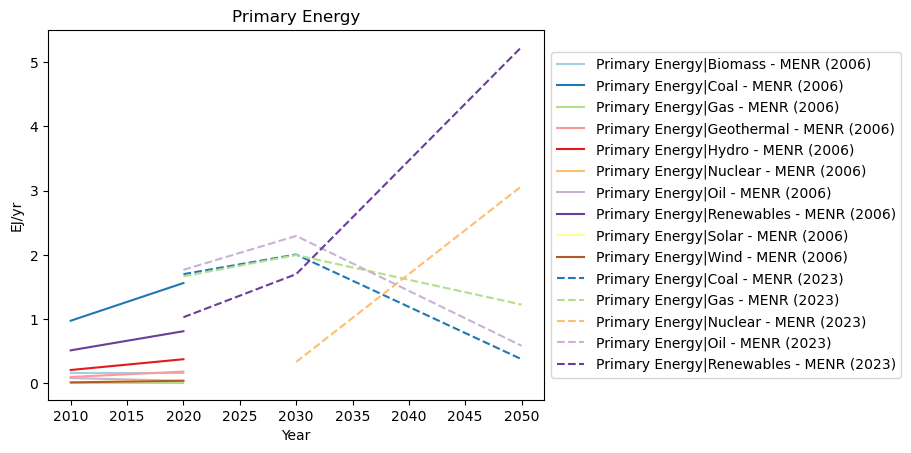

In [31]:
%%capture --no-display
from pyam.plotting import OUTSIDE_LEGEND
cmap = 'Paired'
display_df.filter(region='Turkey').plot(title='Primary Energy', 
                                        color='variable', linestyle="model", cmap=cmap, legend={"loc":"outside right"})

The section on categorization will show more options of the plotting features, as well as a method to set specific colors for different categories. For more information, look at the other tutorials and the [plotting gallery](https://pyam-iamc.readthedocs.io/en/stable/gallery/index.html).

## Visualize timeseries data using the plotting library

This section provides an illustrative example of the plotting features of the **pyam** package.

In the next cell, we show a simple line plot of estimated CO2 emissions. The colours are assigned randomly by default, and **pyam** deactivates the legend if there are too many lines. The **MENR (2023)** values are taken from the [Updated 1st NDC of Turkey to the UNFCCC](https://unfccc.int/sites/default/files/NDC/2023-04/T%C3%9CRK%C4%B0YE_UPDATED%201st%20NDC_EN.pdf) and converted from CO2eq to CO2 using the factor *0.79* calculated from the average ratio between CO2 and CO2eq (excluding LULUCF) emissions in [2022 National Inventory Report of Turkey](https://unfccc.int/documents/461926).

<Axes: title={'center': 'CO2 Emissions'}, xlabel='Year', ylabel='Mt CO2/yr'>

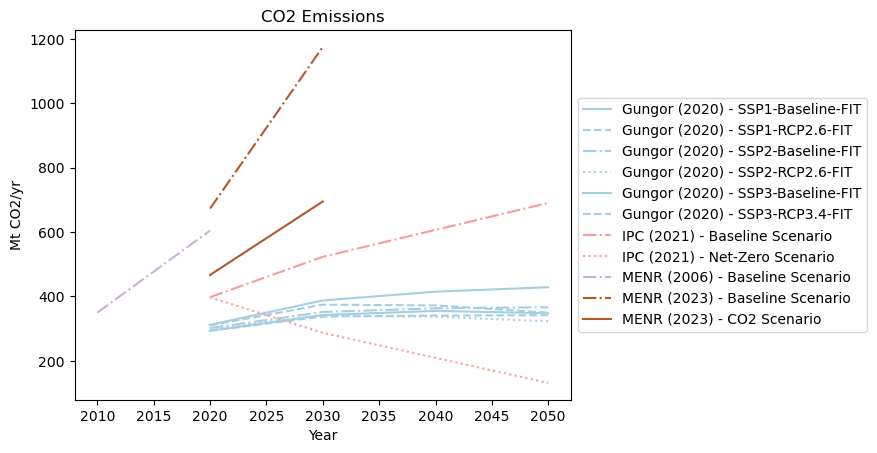

In [32]:
%%capture --no-display
cmap = 'Paired'
df.filter(variable='Emissions|CO2', region='Turkey').plot(color='model', title='CO2 Emissions',
                                                          linestyle='scenario', cmap=cmap, legend={"loc":"outside right"})

## Perform scenario diagnostic and validation checks

When analyzing scenario results, it is often useful to check whether certain timeseries data exist or the values are within a specific range.
For example, it may make sense to ensure that reported data for historical periods are close to established reference data or that near-term developments are reasonable.

Before diving into the diagnostics and validation features, we need to briefly introduce the 'meta' table.
This attribute of an **IamDataFrame** is a [pandas.DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html), which can be used to store categorization information and quantitative indicators of each model-scenario.
Per default, a new **IamDataFrame** will contain a column `exclude`, which is set to `False` for all model-scenarios.

The next cell shows the first 10 rows of the 'meta' table.

In [33]:
df.meta.head(10)

exclude
model         scenario                     
Gungor (2020) SSP1-Baseline-FIT       False
              SSP1-RCP2.6-FIT         False
              SSP2-Baseline-FIT       False
              SSP2-RCP2.6-FIT         False
              SSP3-Baseline-FIT       False
              SSP3-RCP3.4-FIT         False
IPC (2020)    Alternative Scenario    False
              Reference Scenario      False
IPC (2021)    Baseline Scenario       False
              Net-Zero Scenario       False

The following section provides three illustrations of the diagnostic tools:
0. Verify that a timeseries `Primary Energy` exists in each scenario
   (in at least one year and, in a second step, in the last year of the horizon).
1. Validate whether scenarios deviate by more than 10% from the `Primary Energy` reference data reported in the *IEA Energy Statistics* in 2010.
2. Use the `exclude_on_fail` option of the validation function to create a sub-selection of the scenario ensemble.

### Check for required variables

We first use the [require_variable()](https://pyam-iamc.readthedocs.io/en/stable/api/iamdataframe.html#pyam.IamDataFrame.require_variable) function to assert that the scenarios contain data for the expected timeseries.

In [34]:
df.require_variable(variable='Primary Energy', year=2020)

C:\Users\ggungor\AppData\Local\Temp\ipykernel_13876\1214331761.py:1: DeprecationWarning: This method is deprecated and will be removed in future versions. Use `df.require_data()` instead.
  df.require_variable(variable='Primary Energy', year=2020)
pyam.core - INFO: 8 scenarios do not include required variable `Primary Energy`


,model,scenario
0,IPC (2020),Alternative Scenario
1,IPC (2020),Reference Scenario
2,IPC (2021),Baseline Scenario
3,IPC (2021),Net-Zero Scenario
4,MENR (2023),Baseline Scenario
5,TUBITAK (2012),Baseline Scenario
6,TUBITAK (2012),Optimistic Scenario
7,TUBITAK (2012),Pessimistic Scenario


In [35]:
df.require_variable(variable='Primary Energy', year=2030)

C:\Users\ggungor\AppData\Local\Temp\ipykernel_13876\800175749.py:1: DeprecationWarning: This method is deprecated and will be removed in future versions. Use `df.require_data()` instead.
  df.require_variable(variable='Primary Energy', year=2030)
pyam.core - INFO: 7 scenarios do not include required variable `Primary Energy`


,model,scenario
0,IPC (2021),Baseline Scenario
1,IPC (2021),Net-Zero Scenario
2,MENR (2006),Baseline Scenario
3,MENR (2023),Baseline Scenario
4,TUBITAK (2012),Baseline Scenario
5,TUBITAK (2012),Optimistic Scenario
6,TUBITAK (2012),Pessimistic Scenario


### Use the `exclude_on_fail` feature to create a sub-selection of the scenario ensemble

Per default, the functions above only report how many scenarios or which data points do not satisfy the validation criteria above.
However, they also have an option to `exclude_on_fail`, which marks all scenarios failing the validation as `exclude=True` in the 'meta' table.
This feature can be particularly helpful when a user wants to perform a number of validation steps and then efficiently remove all scenarios violating any of the criteria as part of a scripted workflow.

We illustrate a simple validation workflow using the CO2 emissions. The next cell shows the trajectories of CO2 emissions across all scenarios.

<Axes: title={'center': 'CO2 Emissions'}, xlabel='Year', ylabel='Mt CO2/yr'>

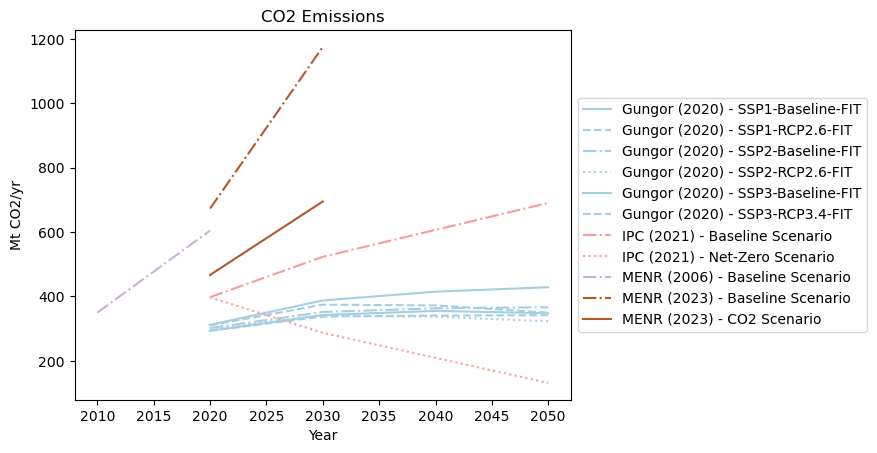

In [36]:
%%capture --no-display
df.filter(variable='Emissions|CO2').plot(color='model', title='CO2 Emissions',
                                         linestyle='scenario', cmap=cmap, legend={"loc":"outside right"})

The next two cells perform validation to exclude all scenarios that have implausibly low emissions in 2020 (i.e., unrealistic near-term behaviour) as well as those that do not reduce emissions over the modeling horizon (i.e., exceed a value of 600 MT CO2 in any year).

In [37]:
df.validate(criteria={'Emissions|CO2': {'lo': 300, 'year': 2020}}, exclude_on_fail=True)

pyam.core - INFO: 2 of 272 data points do not satisfy the criteria
pyam.core - INFO: 2 non-valid scenarios will be excluded


,model,scenario,region,variable,unit,year,type,value
0,Gungor (2020),SSP1-Baseline-FIT,Turkey,Emissions|CO2,Mt CO2/yr,2020,Linear Programming,293.826
1,Gungor (2020),SSP1-RCP2.6-FIT,Turkey,Emissions|CO2,Mt CO2/yr,2020,Linear Programming,293.363


In [38]:
df.validate(criteria={'Emissions|CO2': {'up': 600}, 'year': 2020}, exclude_on_fail=True)

pyam.core - INFO: 5 of 272 data points do not satisfy the criteria
pyam.core - INFO: 4 non-valid scenarios will be excluded


,model,scenario,region,variable,unit,year,type,value
0,IPC (2021),Baseline Scenario,Turkey,Emissions|CO2,Mt CO2/yr,2050,CGE,690.50
1,MENR (2006),Baseline Scenario,Turkey,Emissions|CO2,Mt CO2/yr,2020,Market Based Simulation,604.63
2,MENR (2023),Baseline Scenario,Turkey,Emissions|CO2,Mt CO2/yr,2020,Linear Programming,673.00
3,MENR (2023),Baseline Scenario,Turkey,Emissions|CO2,Mt CO2/yr,2030,Linear Programming,1175.00
4,MENR (2023),CO2 Scenario,Turkey,Emissions|CO2,Mt CO2/yr,2030,Linear Programming,695.00


We can select all scenarios that have *not* been marked to be excluded by adding `exclude=False` to the [filter()](https://pyam-iamc.readthedocs.io/en/stable/api/iamdataframe.html#pyam.IamDataFrame.filter) statement.

To highlight the difference between the full scenario set and the reduced scenario set based on the validation exclusions, the next cell puts the two plots side by side with a shared y-axis.

In [39]:
df.meta

exclude
model          scenario                     
Gungor (2020)  SSP1-Baseline-FIT        True
               SSP1-RCP2.6-FIT          True
               SSP2-Baseline-FIT       False
               SSP2-RCP2.6-FIT         False
               SSP3-Baseline-FIT       False
               SSP3-RCP3.4-FIT         False
IPC (2020)     Alternative Scenario    False
               Reference Scenario      False
IPC (2021)     Baseline Scenario        True
               Net-Zero Scenario       False
MENR (2006)    Baseline Scenario        True
MENR (2023)    Baseline Scenario        True
               CO2 Scenario             True
TUBITAK (2012) Baseline Scenario       False
               Optimistic Scenario     False
               Pessimistic Scenario    False

<Axes: title={'center': 'CO2 Emissions (included)'}, xlabel='Year', ylabel='Mt CO2/yr'>

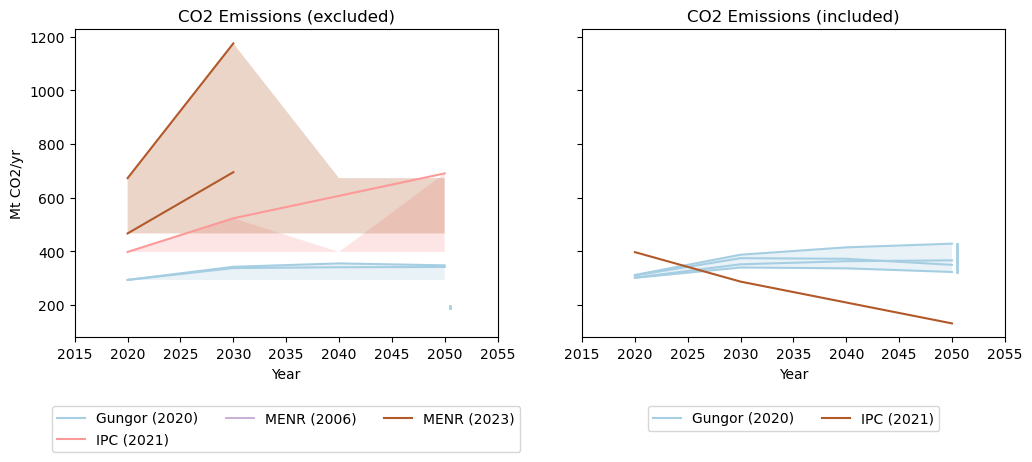

In [40]:
%%capture --no-display
fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
df_co2 = df.filter(variable='Emissions|CO2', year=range(2020,2060))
df_co2.filter(exclude=True).plot(ax=ax[0],title='CO2 Emissions (excluded)',color='model', fill_between=True, final_ranges=True,
            cmap=cmap, legend={"loc":"outside bottom"})
df_co2.filter(exclude=False).plot(ax=ax[1],title='CO2 Emissions (included)',color='model', fill_between=True, final_ranges=True,
                                  cmap=cmap, legend={"loc":"outside bottom"})

# Meta-analysis of scenarios

Although the fossil fuel reserves are modest in Turkey, their share in primary energy supply is above **80%** ([OECD Statistics](https://stats.oecd.org/fileview2.aspx?IDFile=0144c270-446f-48db-88f0-4ea1542244a5)). We categorize the scenarios according to the share of ``Primary Energy|Coal``.
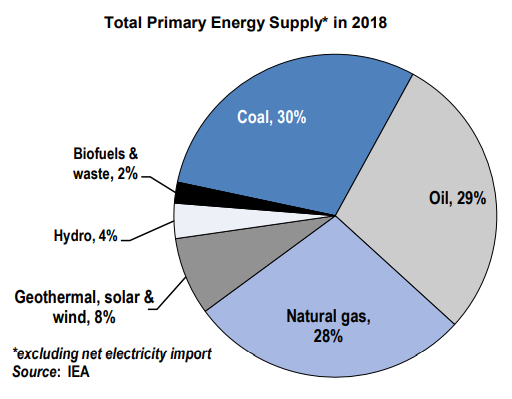

First, we subtract ``Primary Energy|Coal`` from total ``Primary Energy`` and draw a simple plot.

<Axes: title={'center': 'region: Turkey - variable: diff'}, xlabel='Year', ylabel='EJ/yr'>

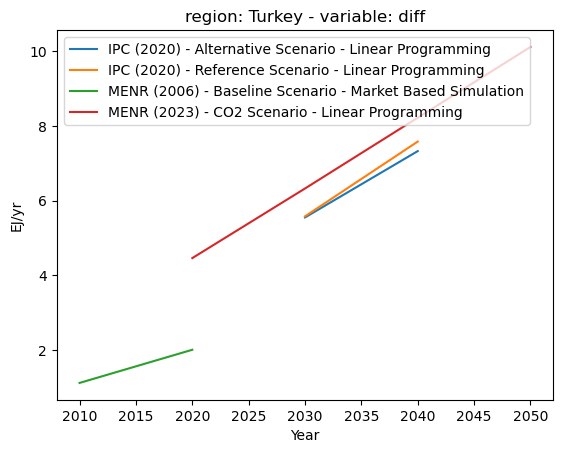

In [41]:
df.subtract("Primary Energy", "Primary Energy|Coal", "diff").plot()

## Computing coal as a share of primary energy
Next, we can also compute the share of ``Primary Energy|Coal`` relative to total ``Primary Energy``, and again draw the plot.

In [42]:
df.divide("Primary Energy|Coal", "Primary Energy", "Share of coal", append=True)

In [43]:
df.set_meta(meta="above 30%", name="Share of coal")

In [44]:
df.categorize(
    "Share of coal", "below 30%",
    criteria={"Share of coal": {"up": 0.3}},
)

pyam.core - INFO: 3 scenarios categorized as `Share of coal: below 30%`


In [45]:
df.filter(variable="Share of coal").timeseries()

2010  \
model       scenario             region variable      unit type                               
IPC (2020)  Alternative Scenario Turkey Share of coal      Linear Programming           NaN   
            Reference Scenario   Turkey Share of coal      Linear Programming           NaN   
MENR (2006) Baseline Scenario    Turkey Share of coal      Market Based Simulation  0.46507   
MENR (2023) CO2 Scenario         Turkey Share of coal      Linear Programming           NaN   

                                                                                        2020  \
model       scenario             region variable      unit type                                
IPC (2020)  Alternative Scenario Turkey Share of coal      Linear Programming            NaN   
            Reference Scenario   Turkey Share of coal      Linear Programming            NaN   
MENR (2006) Baseline Scenario    Turkey Share of coal      Market Based Simulation  0.437280   
MENR (2023) CO2 Scenario         Turkey Share of coal      Linear Programming       0.275815   

                                                                                        2030  \
model       scenario             region variable      unit type                                
IPC (2020)  Alternative Scenario Turkey Share of coal      Linear Programming       0.239679   
            Reference Scenario   Turkey Share of coal      Linear Programming       0.282562   
MENR (2006) Baseline Scenario    Turkey Share of coal      Market Based Simulation       NaN   
MENR (2023) CO2 Scenario         Turkey Share of coal      Linear Programming       0.240704   

                                                                                        2040  \
model       scenario             region variable      unit type                                
IPC (2020)  Alternative Scenario Turkey Share of coal      Linear Programming       0.128052   
            Reference Scenario   Turkey Share of coal      Linear Programming       0.219397   
MENR (2006) Baseline Scenario    Turkey Share of coal      Market Based Simulation       NaN   
MENR (2023) CO2 Scenario         Turkey Share of coal      Linear Programming            NaN   

                                                                                        2050  
model       scenario             region variable      unit type                               
IPC (2020)  Alternative Scenario Turkey Share of coal      Linear Programming            NaN  
            Reference Scenario   Turkey Share of coal      Linear Programming            NaN  
MENR (2006) Baseline Scenario    Turkey Share of coal      Market Based Simulation       NaN  
MENR (2023) CO2 Scenario         Turkey Share of coal      Linear Programming       0.035914

In [46]:
df.meta

exclude Share of coal
model          scenario                                   
Gungor (2020)  SSP1-Baseline-FIT        True     above 30%
               SSP1-RCP2.6-FIT          True     above 30%
               SSP2-Baseline-FIT       False     above 30%
               SSP2-RCP2.6-FIT         False     above 30%
               SSP3-Baseline-FIT       False     above 30%
               SSP3-RCP3.4-FIT         False     above 30%
IPC (2020)     Alternative Scenario    False     below 30%
               Reference Scenario      False     below 30%
IPC (2021)     Baseline Scenario        True     above 30%
               Net-Zero Scenario       False     above 30%
MENR (2006)    Baseline Scenario        True     above 30%
MENR (2023)    Baseline Scenario        True     above 30%
               CO2 Scenario             True     below 30%
TUBITAK (2012) Baseline Scenario       False     above 30%
               Optimistic Scenario     False     above 30%
               Pessimistic Scenario    False     above 30%

In [47]:
%%capture --no-display
df.aggregate("Secondary Energy|Electricity", append=True)

In [48]:
df.filter(variable="Secondary Energy|Electricity").timeseries()

,,,,,,2050,2010,2020,2030
model,scenario,region,variable,unit,type,,,,
IPC (2021),Baseline Scenario,Turkey,Secondary Energy|Electricity,EJ/yr,CGE,0.135,NaN,NaN,NaN
MENR (2006),Baseline Scenario,Turkey,Secondary Energy|Electricity,EJ/yr,Market Based Simulation,NaN,0.8712,1.73880,NaN
MENR (2023),CO2 Scenario,Turkey,Secondary Energy|Electricity,EJ/yr,Linear Programming,NaN,NaN,1.57212,2.4012


### Comparison with CO2 emission forecasts

We can select all scenarios that have not been marked to be excluded by adding exclude=False to the filter() statement.

To highlight the difference between the full scenario set and the reduced scenario set based on the validation exclusions, the next cell puts the two plots side by side with a shared y-axis.

<Axes: title={'center': 'Primary Energy (included)'}, xlabel='Year', ylabel='EJ/yr'>

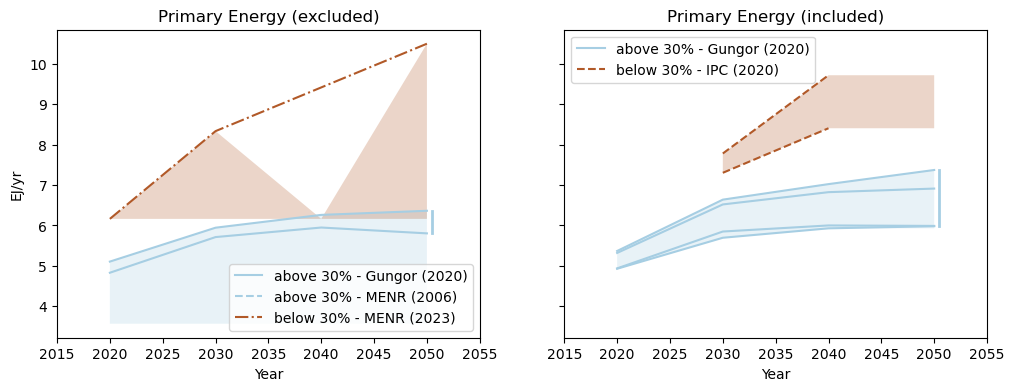

In [49]:
%%capture --no-display
cmap = 'Paired'
fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
df_pe = df.filter(variable="Primary Energy", year=range(2020,2060))
df_pe.filter(exclude=True).plot(ax=ax[0], color="Share of coal", linestyle="model", fill_between=True, final_ranges=True,
           cmap=cmap, title="Primary Energy (excluded)", legend={"loc":"best"}),
df_pe.filter(exclude=False).plot(ax=ax[1], color="Share of coal", linestyle="model", fill_between=True, final_ranges=True,
          cmap=cmap, title="Primary Energy (included)", legend={"loc":"best"})

# Energy Market

The energy market exchange amounts and prices are continuously published by the energy market operator [EPİAŞ Transparency Platform](https://seffaflik.epias.com.tr/transparency/index.xhtml).

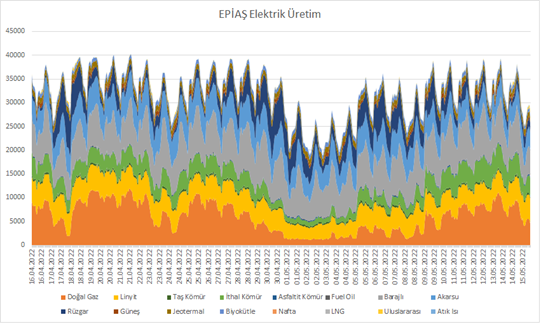 


The one-month period from 16th of April to 16th of May 2022 includes Ramadan holiday where electricity demand is reduced. The market exchange price, which is around the cap during workdays, drops during the holiday period. 

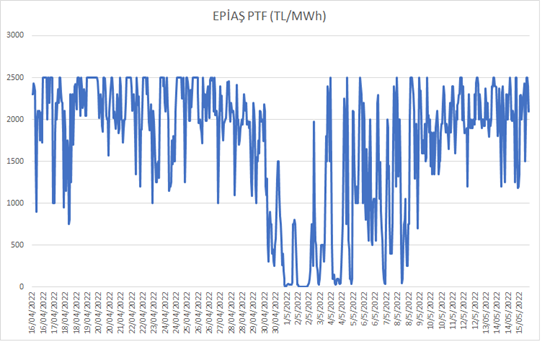

## Energy flows for electricity generation with storage

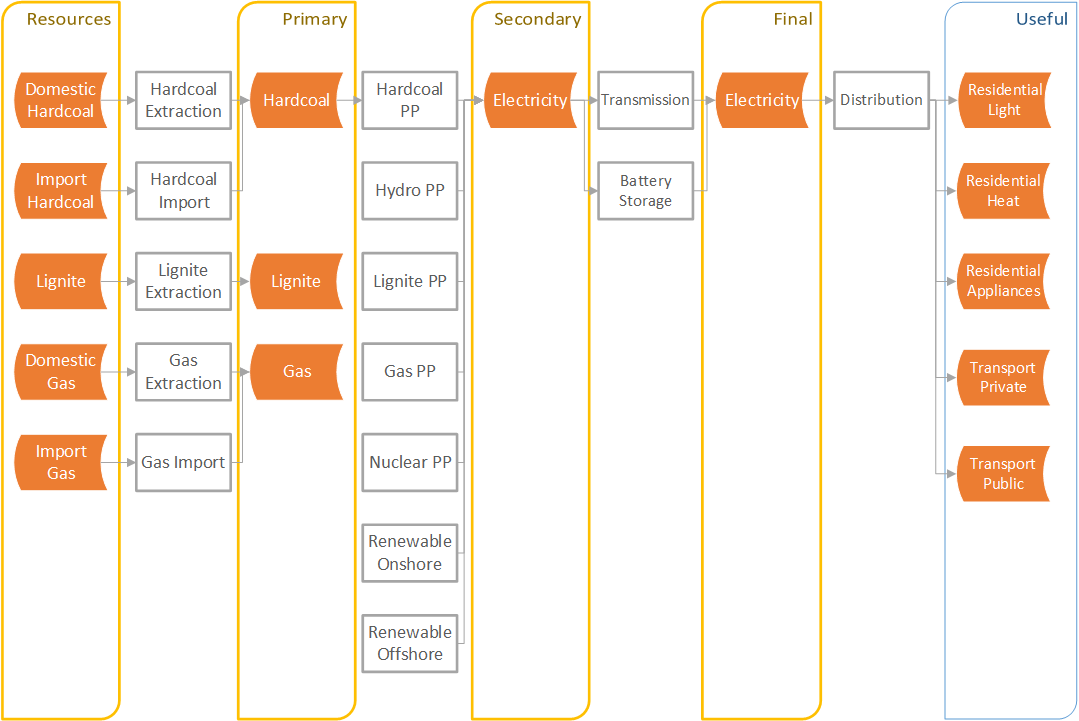

## Further steps

- Include data from recent academic (peer-reviewed) studies based on the net-zero target of Turkey
- Extract meta-data for emissions and related temperature increase using **MAGICC** emulator
- Develop a model for the low carbon transition of the electricity sector 
- Test the hypothesis for utilizing hydrogen and battery storage as a market solution for low carbon transition

## Questions?

Take a look at our [GitHub repository](https://github.com/gorkemgungormetu/turkish_energy_and_climate_pathways.git)!

In [50]:
df.to_excel('data_export.xlsx')